# India Covid'19 Data Analysis

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"ArogyaSetu2.csv")

## Data

In [4]:
df.head()

,STATE,CONFIRMED,RECOVERED,DEATHS
0,MAHARASHTRA,77793,33681,2710
1,TAMIL NADU,27256,14901,220
2,NCT OF DELHI,25006,9898,650
3,GUJRAT,18584,12667,1155
4,RAJASTHAN,9862,7104,213


## Creating New Data Points

In [5]:
df['RECOVERY RATE(%)'] = round((df['RECOVERED'].astype('float')/df['CONFIRMED'])*100)

In [6]:
df['DEATH RATE(%)'] = round((df['DEATHS'].astype('float')/df['CONFIRMED'])*100)

In [7]:
df.head()

,STATE,CONFIRMED,RECOVERED,DEATHS,RECOVERY RATE(%),DEATH RATE(%)
0,MAHARASHTRA,77793,33681,2710,43.0,3.0
1,TAMIL NADU,27256,14901,220,55.0,1.0
2,NCT OF DELHI,25006,9898,650,40.0,3.0
3,GUJRAT,18584,12667,1155,68.0,6.0
4,RAJASTHAN,9862,7104,213,72.0,2.0


## Calculating Pearson Correlation Coefficient b/w Confirmed Cases vs Recovered Cases

In [26]:
from scipy import stats
pearson_coef,p_value=stats.pearsonr(df['CONFIRMED'].astype('float'),df['RECOVERED'].astype('float'))
print(pearson_coef)
print(p_value)
if(p_value<=0.001 and 0<pearson_coef<1):
    print('The confirmed cases and the recovery are stronlgy +ve related')
elif(p_value<=0.001 and -1<pearson_coef<0):
    print('The confirmed cases and the recovery are stronlgy -ve related')
else:
    print("No relation")

0.9861683121443352
6.503076055555237e-29
The confirmed cases and the recovery are stronlgy +ve related


## Calculating Pearson Correlation Coefficient b/w Death Cases vs Recovered Cases

In [27]:
from scipy import stats
pearson_coef,p_value=stats.pearsonr(df['DEATHS'].astype('float'),df['RECOVERED'].astype('float'))
print(pearson_coef)
print(p_value)
if(p_value<=0.001 and 0<pearson_coef<1):
    print(' The deaths and the recovery are stronlgy +ve related ')
elif(p_value<=0.001 and -1<pearson_coef<0):
    print('The deaths and the recovery are stronlgy -ve related')
else:
    print("No relation")

0.9381366002282336
1.0771364199150105e-17
 The deaths and the recovery are stronlgy +ve related 


# Exploratory Data Analysis

## Correlation Heatmap

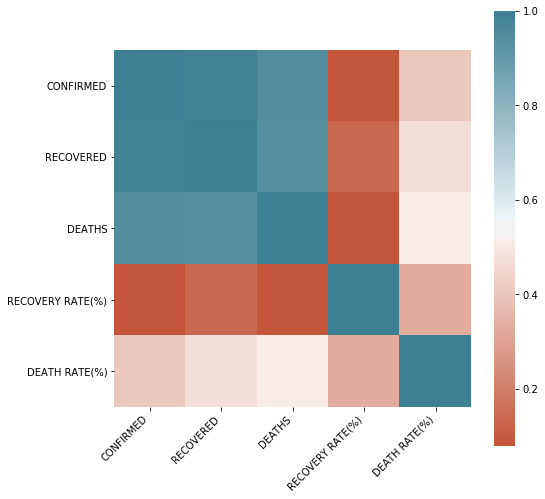

In [25]:
plt.figure(figsize=(8, 8))

ax = sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), square=True)

labels = ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

## Pair Plot

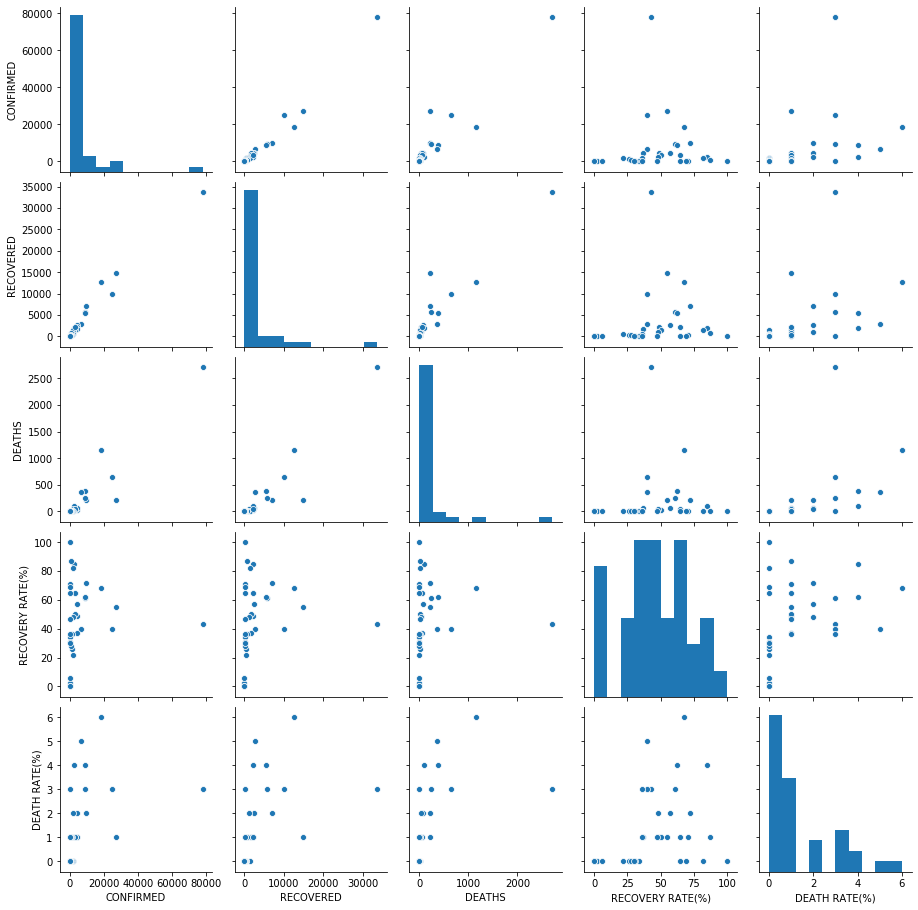

In [28]:
sns.pairplot(data=df)

## Count Plots

In [29]:
LABELS=df['STATE'].tolist()

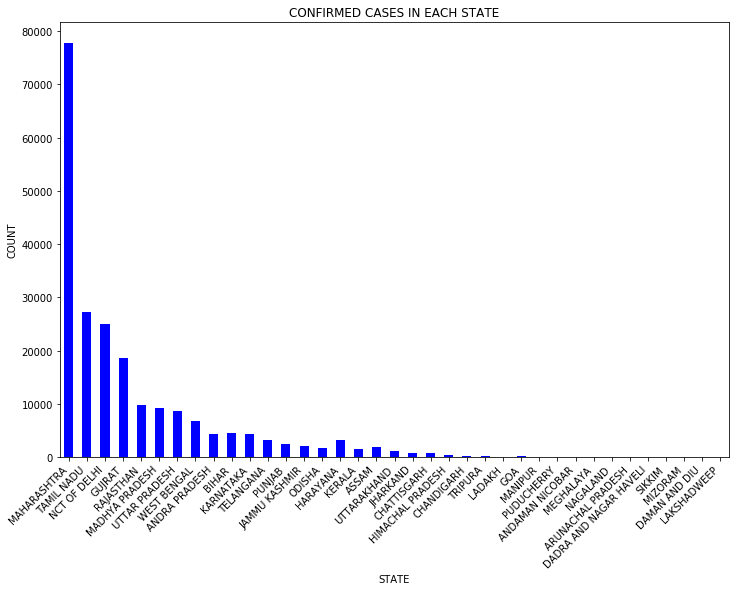

In [38]:
ax = df['CONFIRMED'].plot(kind='bar',figsize=(12,8),color='blue',align='center')
plt.xticks(range(len(df['CONFIRMED'])),LABELS)
plt.title('CONFIRMED CASES IN EACH STATE')
plt.xlabel('STATE')
plt.ylabel('COUNT')

labels = ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

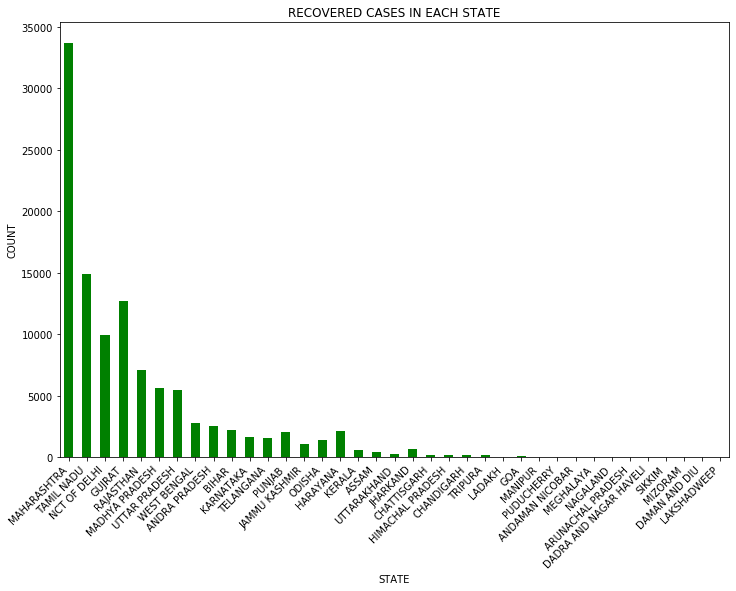

In [39]:
ax = df['RECOVERED'].plot(kind='bar',figsize=(12,8),color='green',align='center')
plt.xticks(range(len(df['RECOVERED'])),LABELS)
plt.title('RECOVERED CASES IN EACH STATE')
plt.xlabel('STATE')
plt.ylabel('COUNT')

labels = ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

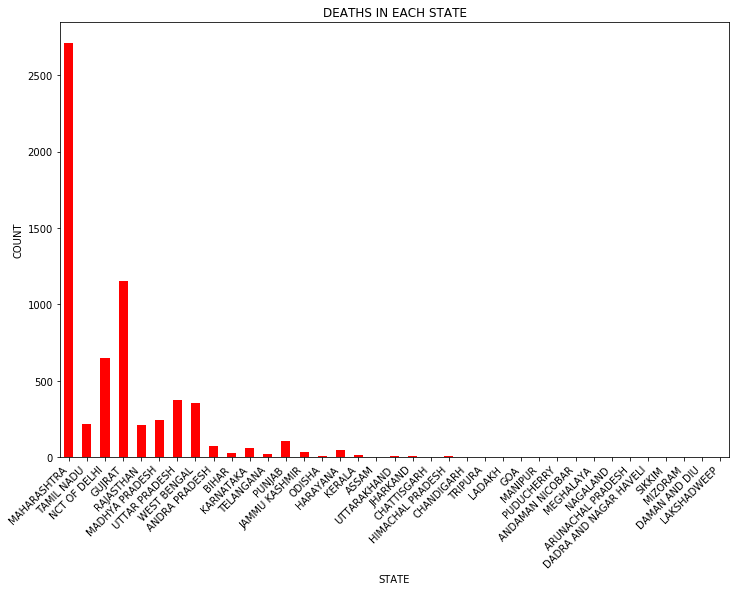

In [40]:
ax = df['DEATHS'].plot(kind='bar',figsize=(12,8),color='red',align='center')
plt.xticks(range(len(df['DEATHS'])),LABELS)
plt.title('DEATHS IN EACH STATE')
plt.xlabel('STATE')
plt.ylabel('COUNT')

labels = ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# Applying Machine Learning Models for Predictions

# Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()

X = df[['CONFIRMED']]
Y = df[['RECOVERED']]

model1 = lm.fit(X,Y)

print(model1)
Yhat = lm.predict(X)
print('The coeficient for our model is as follows',lm.coef_)
print('The intercept for our model is as follows',lm.intercept_)
choice = int(input('Enter the choice of data you want looking at the data set:'))
print('The recovery estimation for ' + str(df['STATE'].loc[choice]) + ' is ' + str(Yhat[choice]))  # enter any value to predict the value of Y
#for finding R^2 error
print('The R sqaure error is :',lm.score(X,Y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The coeficient for our model is as follows [[0.45037363]]
The intercept for our model is as follows [319.93482077]


Enter the choice of data you want looking at the data set: 2


The recovery estimation for NCT OF DELHI is [11581.97779584]
The R sqaure error is : 0.9725279398776069


## Calculating Error in our Predictions

In [35]:
#for finding mean squared error that is MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['RECOVERED'].astype('float'),Yhat)
print("The mean squared error is :",mse)

The mean squared error is : 1068295.9946444726


## Visualizing Our Predictions

Text(0.5, 1.0, 'Regression Plot')

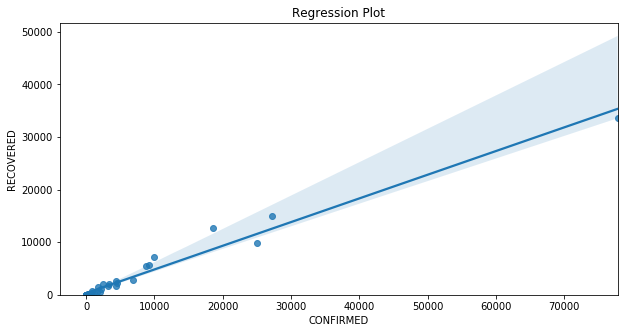

In [19]:
#regression plot
plt.figure(figsize=(10,5))
sns.regplot(x=df['CONFIRMED'].astype('float'),y=df['RECOVERED'].astype('float'),data=df, )
plt.ylim(0,)
plt.title('Regression Plot')

## Residual Plot

Text(0.5, 1.0, 'Residual Plot')

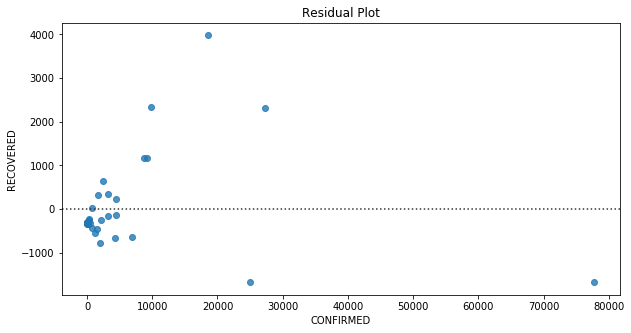

In [20]:
plt.figure(figsize=(10,5))
sns.residplot(df['CONFIRMED'].astype('float'),df['RECOVERED'].astype('float'),data=df)
plt.title('Residual Plot')

## Distribution Plot

Text(0, 0.5, 'RECOVERED')

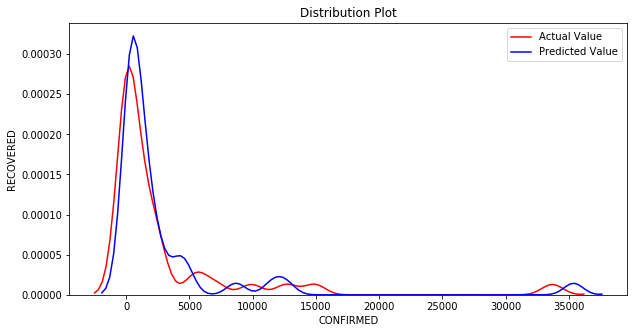

In [21]:
plt.figure(figsize=(10,5))
ax1=sns.distplot(df['RECOVERED'].astype('float'),hist=False,color='red',label='Actual Value')
sns.distplot(Yhat,hist=False,color='blue',label='Predicted Value',ax=ax1)
plt.title('Distribution Plot')
plt.xlabel('CONFIRMED')
plt.ylabel('RECOVERED')

# Multiple Regression Regression

### Y:RESPONSE VARIABLE AND X:PREDICTOR VARIABLE
### y=b0+b1*x

In [37]:
from sklearn.linear_model import LinearRegression

lm1 = LinearRegression()

Z = df[['CONFIRMED','DEATHS']]
Y = df[['RECOVERED']]

model2 = lm1.fit(Z,Y)

print(model2)
Yhat1 = lm1.predict(Z)
print('The coeficient for our model is as follows',lm1.coef_)
print('The intercept for our model is as follows',lm1.intercept_)

choice1=int(input("Enter the state depending ont the data set:"))
print('The prediction for the recovery of ' + str(df['STATE'].loc[choice1]) + ' is '+ str(Yhat1[choice1]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
The coeficient for our model is as follows [[0.43169094 0.56345692]]
The intercept for our model is as follows [333.1012584]


Enter the state depending ont the data set: 2


The prediction for the recovery of NCT OF DELHI is [11494.21179139]


## Distribution Plot

Text(0, 0.5, 'RECOVERED')

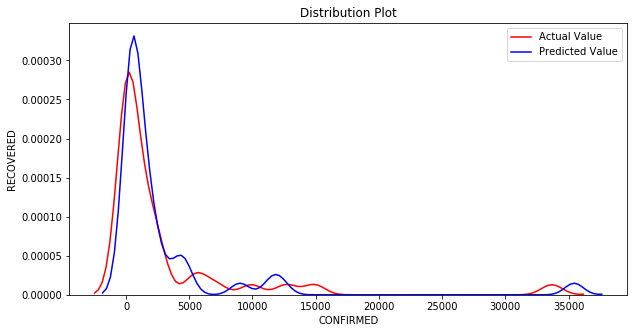

In [41]:
plt.figure(figsize=(10,5))
ax1=sns.distplot(df['RECOVERED'].astype('float'),hist=False,color='red',label='Actual Value')
sns.distplot(Yhat1,hist=False,color='blue',label='Predicted Value',ax=ax1)
plt.title('Distribution Plot')
plt.xlabel('CONFIRMED')
plt.ylabel('RECOVERED')

# Thank You